#                      Predicting Diabetes with Logistic Regression

# Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

# I would be using Machine Learning to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, SkinThickness, Insulin etc.

# .Importing packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# load the data from csv format into pandas

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# DATA EXPLORATION:  I will start by finding correlation of every pair of features (and the outcome variable), and visualize the correlations using a heatmap.

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

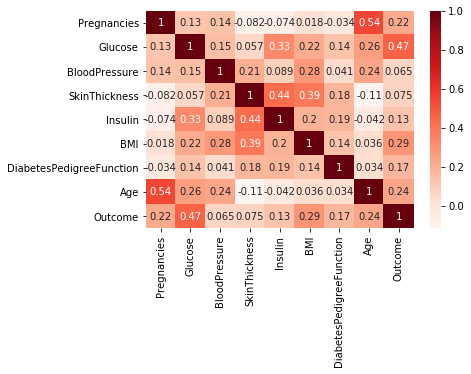

In [4]:
corr = data.corr()
print (corr)
sns.heatmap(corr, annot=True,  cmap=plt.cm.Reds,  xticklabels = corr.columns, yticklabels = corr.columns) #cmap=plt.cm.YlOrBr

# In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable.

# Below is the barplot of people in the dataset that are diabetic and amd those that aren't (non-diabetic people (0) and diabetic people (1) )

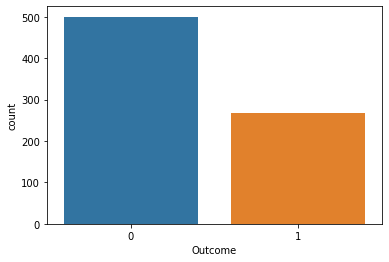

In [6]:
sns.countplot(data["Outcome"])

In [29]:
#splitting data for cross checking
trian_data = data.iloc[:650]
test_data = data.iloc[650:750]
check_data = data.iloc[750:]


In [ ]:
# Convert the values for trian_data test_data into arrays so that I can perfor numpy operation on them

In [32]:
trainLabel = np.asarray(trian_data['Outcome'])
trainData = np.asarray(trian_data.drop('Outcome',1))
testLabel = np.asarray(test_data['Outcome'])
testData = np.asarray(test_data.drop('Outcome',1))


# normalizing the data such that each variable has 0 mean and standard deviation of 1.

In [33]:
means = np.mean(trian_data, axis = 0)
stds = np.std(trian_data, axis = 0)
trian_data = (trian_data - means)/stds
test_data = (test_data - means)/stds


# Training and Evaluating Machine Learning Model We can now train our classification model. We’ll be using a machine simple learning model called logistic regression.

In [37]:
data_check = LogisticRegression(n_jobs = 10)
data_check.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=10, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
accuracy = data_check.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


Text(0.5, 1.0, 'Features to determine diabetic on patient ')

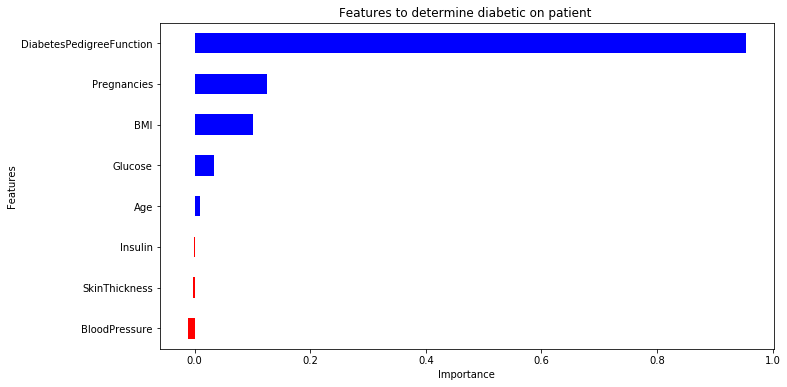

In [40]:
coeff = list(data_check.coef_[0])
labels = list(trian_data.columns[:8])
features = pd.DataFrame({'Features':labels,'importance':coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
plt.title("Features to determine diabetic on patient ")

# Saving the model for future use/re use

In [41]:
joblib.dump([data_check, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

# cross checking if the model works properly

In [42]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


# After the model has been created, I will make predictions with the model

In [43]:
check_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


# I would predict the first 10 rows from the data set i reserved for checking the model

In [46]:
predic_data = check_data[:11]
# prepare sample
predic_data_features = np.asarray(predic_data.drop('Outcome',1))

predic_data_features[0][:9] - means.drop("Outcome")

# predict
predictionProbability = diabetesLoadedModel.predict_proba(predic_data_features)
prediction = diabetesLoadedModel.predict(predic_data_features)
print('Probability:', predictionProbability)

for pre in prediction:
    if pre == 1:
        print ("\n Patient test Positive from data collected: ",pre)
    
    else:
        print ("\n Patient test Negative from data collected: ",pre)
    
    

#print('prediction:', prediction)

Probability: [[0.43027534 0.56972466]
 [0.7101192  0.2898808 ]
 [0.8966786  0.1033214 ]
 [0.30422513 0.69577487]
 [0.30191353 0.69808647]
 [0.55724922 0.44275078]
 [0.54224098 0.45775902]
 [0.68607945 0.31392055]
 [0.8091652  0.1908348 ]
 [0.11430063 0.88569937]
 [0.90001864 0.09998136]]

 Patient test Positive from data collected:  1

 Patient test Negative from data collected:  0

 Patient test Negative from data collected:  0

 Patient test Positive from data collected:  1

 Patient test Positive from data collected:  1

 Patient test Negative from data collected:  0

 Patient test Negative from data collected:  0

 Patient test Negative from data collected:  0

 Patient test Negative from data collected:  0

 Patient test Positive from data collected:  1

 Patient test Negative from data collected:  0


In [49]:
predic_data_features[0][:9] - means.drop("Outcome")

Pregnancies                  0.201538
Glucose                     15.792308
BloodPressure                1.390769
SkinThickness              -20.335385
Insulin                    -79.073846
BMI                         -0.617385
DiabetesPedigreeFunction     0.703485
Age                        -11.044615
dtype: float64

In [55]:
(0.90001864 + 0.09998136)

1.0

In [62]:
np.random.randint(3,10,10)

array([9, 3, 8, 6, 6, 3, 3, 8, 4, 5])

In [ ]:
labels

In [ ]:
data_check.coef_[0]

In [ ]:
features

In [ ]:
test =pd.DataFrame({"features":labels, "impotance":coeff})
test.set_index("features", inplace = True)
test["positive"] = test['impotance'] > 0
test


In [ ]:
test.sort_values(by =['impotance'], ascending = True, inplace = True)
test.impotance.plot(kind = 'barh',figsize=(11, 6),color = test.positive.map({True: 'blue', False: 'red'}))


In [ ]:

features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))

In [ ]:
check_data.head()